# Artificial Neural Networks

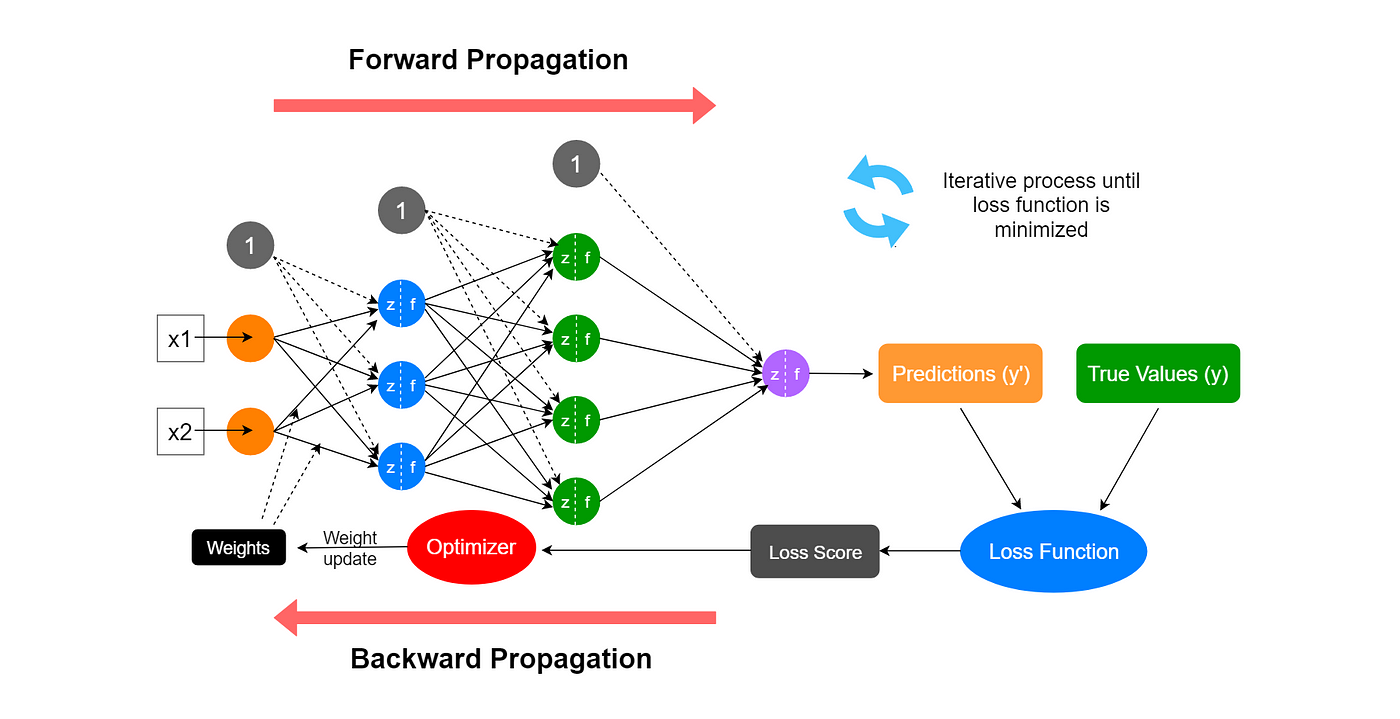

In [ ]:
! gdown 1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC

Downloading...
From: https://drive.google.com/uc?id=1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC
To: /content/data_g1.csv
100% 9.79M/9.79M [00:00<00:00, 85.8MB/s]


# Import the required libraries


We will use [keras](https://keras.io/) for building neural networks.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Set pandas option to display all columns

In [ ]:
pd.set_option('display.max_columns', None)

### Read the dataset

In [ ]:
data = pd.read_csv('data_g1.csv')

In [ ]:
data = data.drop(columns=['id'])

### Check for missing values

Note: Just like all the models so far, for neural networks we have to handle missing values, encode categorical (string) variables and scale the numeric values.

In [ ]:
data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

Check if the dataset is balanced

<Axes: >

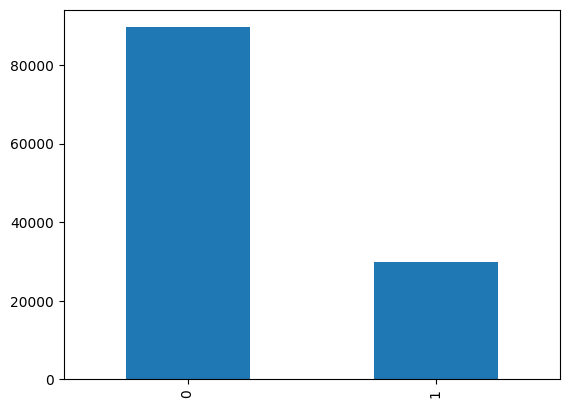

In [ ]:
data['smoking'].value_counts().plot.bar()

# Classification

The classification target is the column 'smoking'

In [ ]:
X, Y = data.drop(columns='smoking'), data['smoking']

In [ ]:
X.describe()

age     height(cm)     weight(kg)      waist(cm)  \
count  119603.000000  119603.000000  119603.000000  119603.000000   
mean       45.219727     163.775482      65.460080      82.100653   
std        12.019891       9.060404      12.547429       9.062907   
min        20.000000     135.000000      30.000000      51.000000   
25%        40.000000     155.000000      55.000000      76.000000   
50%        45.000000     165.000000      65.000000      82.000000   
75%        55.000000     170.000000      75.000000      88.000000   
max        85.000000     190.000000     130.000000     127.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count   119603.000000    119603.000000  119603.000000   119603.000000   
mean         0.990653         0.984779       1.025911        1.025367   
std          0.407614         0.400383       0.158870        0.157239   
min          0.100000         0.100000       1.000000        1.000000   
25%          0.800000         0.800000       1.000000        1.000000   
50%          1.000000         1.000000       1.000000        1.000000   
75%          1.200000         1.200000       1.000000        1.000000   
max          9.900000         9.900000       2.000000        2.000000   

            systolic     relaxation  fasting blood sugar    Cholesterol  \
count  119603.000000  119603.000000        119603.000000  119603.000000   
mean      122.200396      76.493441            97.780081     196.337826   
std        13.018763       9.106010            14.726080      28.709735   
min        77.000000      44.000000            46.000000      91.000000   
25%       113.000000      70.000000            89.000000     175.000000   
50%       121.000000      77.000000            95.000000     197.000000   
75%       130.000000      82.000000           103.000000     218.000000   
max       213.000000     133.000000           369.000000     393.000000   

        triglyceride            HDL            LDL     hemoglobin  \
count  119603.000000  119603.000000  119603.000000  119603.000000   
mean      119.215388      57.282677     115.370058      14.553406   
std        63.269753      14.272188      28.504080       1.471435   
min         8.000000       9.000000      15.000000       4.900000   
25%        71.000000      46.000000      95.000000      13.500000   
50%       105.000000      55.000000     115.000000      14.700000   
75%       156.000000      66.000000     134.000000      15.700000   
max       766.000000     136.000000    1860.000000      20.400000   

       Urine protein  serum creatinine            AST            ALT  \
count  119603.000000     119603.000000  119603.000000  119603.000000   
mean        1.077364          0.874245      25.297559      25.464194   
std         0.354414          0.185319       9.364472      17.450445   
min         1.000000          0.100000       6.000000       1.000000   
25%         1.000000          0.700000      20.000000      16.000000   
50%         1.000000          0.900000      23.000000      21.000000   
75%         1.000000          1.000000      29.000000      31.000000   
max         6.000000          9.900000     778.000000    2914.000000   

                 Gtp  dental caries  
count  119603.000000  119603.000000  
mean       32.554025       0.182052  
std        28.076767       0.385889  
min         2.000000       0.000000  
25%        17.000000       0.000000  
50%        25.000000       0.000000  
75%        39.000000       0.000000  
max       926.000000       1.000000

Split the dataset into training and testing subsets (80% - 20%)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

We use MinMax sclaer in order to enable the network to converge faster and to have weights with smaller magnitudes.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
len(X_train[0])

22

We create a ``Sequential`` keras model. The ``Dense`` layers represent fully-connected layers. We specify the number of neurons as the first argument and the activation function as the second.

Note: For binary classification, we use the ``sigmoid`` activation function with one neuron. (For multiclass we use as many nodes as we have classes and the ``softmax`` activation function)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

We use the `BinaryCrossentropy` loss function for binary classification. We also need to set the optimizer, and optionally some metrics to track.


In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

We will fit the model for 3 epochs with a batch size of 8.

**Note: The number of epochs is very low, in practice it's usually at least 50. It's set this way for demonstration purposes.**

In [ ]:
history = model.fit(X_train, Y_train.values, epochs=3, batch_size=8)

Epoch 1/3
11961/11961 [==============================] - 44s 4ms/step - loss: 0.4055 - precision: 0.6162 - recall: 0.4446
Epoch 2/3
11961/11961 [==============================] - 39s 3ms/step - loss: 0.4043 - precision: 0.6131 - recall: 0.4462
Epoch 3/3
11961/11961 [==============================] - 42s 3ms/step - loss: 0.4032 - precision: 0.6143 - recall: 0.4560


In [ ]:
history.params

{'verbose': 1, 'epochs': 3, 'steps': 11961}

In [ ]:
history.history

{'loss': [0.40546783804893494, 0.40432918071746826, 0.40323933959007263],
 'precision': [0.6161896586418152, 0.6130918264389038, 0.6142648458480835],
 'recall': [0.4446159601211548, 0.4462430775165558, 0.45596393942832947]}

Plot the metrics per epoch

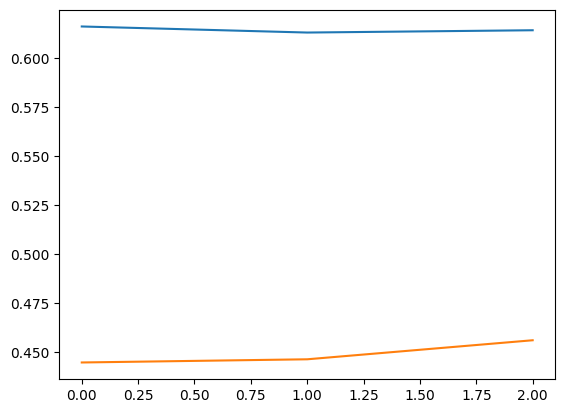

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])

# Regression

Let's change the target, and try to predic the ``systolic`` blood pressure.

In [ ]:
X, Y = data.drop(columns='systolic'), data['systolic']

Split the dataset in a training and testing subset (80%-20%)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Scale the features

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We also need to scale the target variables for faster conversion and smaller weight magnitude.

In [ ]:
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train = scaler.transform(Y_train.values.reshape(-1, 1))
Y_test = scaler.transform(Y_test.values.reshape(-1, 1))

Create the same model as before.

Note: Only the activation function in the last layer differs. For regression we use the activation ``linear`` with one node at the end.

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

For regression, a good loss function is ``MeanSquaredError``. We also need to define the optimizer and optionally some metrics.

In [ ]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

Train the model with 3 epochs and a batch size of 8.

In [ ]:
history = model.fit(X_train, Y_train, epochs=3, batch_size=8)

Epoch 1/3
11961/11961 [==============================] - 37s 3ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0490
Epoch 2/3
11961/11961 [==============================] - 34s 3ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0476
Epoch 3/3
11961/11961 [==============================] - 44s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0474


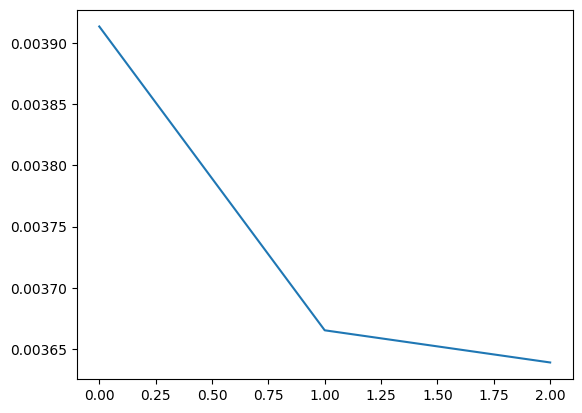

In [ ]:
plt.plot(history.history['loss'])

Predict the output

In [ ]:
preds = model.predict(X_test)

748/748 [==============================] - 1s 2ms/step


In order to calculate the metrics for the predictions and the actual values we need to perforn ``inverse_transform`` to get the original values back. If we don't do this, when calculating the scores we will have misleading values because the predictions and the targets will be between 0 and 1.

In [ ]:
preds = scaler.inverse_transform(preds)

In [ ]:
Y_test = scaler.inverse_transform(Y_test)

In [ ]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(64.72504421238021, 6.299814174727529, 0.620915696399294)